# Introduction to Data Modeling with PyTorch

This notebook is an introduction to PyTorch that builds intuition step by step. We start by working with tensors and by visualizing simple data in one, two, and three dimensions, mainly using scatter plots. This first part is a gentle warm-up, but it also highlights an important point: real data are noisy, and this noise matters when we try to understand or model them.

Next, we look at how to represent models using PyTorch and how to think about models in relation to data. We treat models as objects with parameters that can be adjusted, rather than as fixed equations. We then introduce the idea of fitting a model to data by minimizing a loss function, and show why efficient optimization methods are important when estimating parameters. In the final part, we explore PyTorch’s automatic differentiation (autograd) to see how gradients are computed and how they support efficient optimization. 

By the end of the notebook, PyTorch should feel like a practical and flexible tool for building, visualizing, and fitting models to data, which we'll build on in future sessions as we begin to explore deep learning.

## Setup

### Import Packages

In [2]:
import matplotlib.pyplot as plt
import torch
from torch import nn

---

## Section 1: Data Generation and Visualization

The goal of this section is to learn PyTorch syntax and  build intuition for how data behave. We'll generate simple synthetic datasets, visualize them using raster plots and scatter plots, and see how noise naturally appears in data. 


| Code | Description |
| :-- | :-- |
| **`x = torch.tensor([1., 2., 3.])`** | Store 3 floats in a PyTorch tensor. |
| **`x = torch.empty(10).normal_()`** | Make a tensor of 10 normally-distributed random data (Mean=0, SD=1 by default) |
| **`x = torch.empty(10).uniform_(1, 5)`** | Make a tensor of 10 uniformly-distributed random data between 1 and 5 |
| **`plt.eventplot(x)`** | Make a 1D raster plot. |
| **`plt.scatter(x, y)`** | Make a 2D scatter plot. |
| **`plt.scatter(x, y, c)`** | Make a 2D scatter plot, with color representing a third variable. Use `plt.colorbar(label='y')` to show the color axis. |




### Exercises

**Example**: Print the values of a tensor made up of `[1.2, 2.3]`.

In [3]:
torch.tensor([1.2, 2.3])

tensor([1.2000, 2.3000])

**Exercise**: Print the values of a tensor made up of `[1.5, 2.8, 0.7]`.

**Exercise**: Create a tensor with 5 random, normally-distributed data points.

**Exercise**: Create a tensor with 10 random, uniformly-distributed data points between the values **2** and **6**.

**Example**: Plot all the values in `x` with `plt.eventplot(x)`, which contains 100 uniformly-distributed data points between the values **-2** and **4**.

**Example**: Plot a scatterplot with `plt.scatter(x, y)`, showing the relationship between:
  - **x**: 100 normally-distributed random data points
  - **y**: also 100 normally-distributed random data points

Text(0, 0.5, 'y')

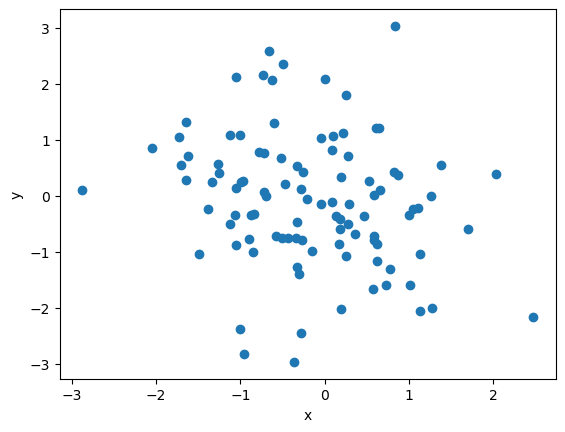

In [8]:
x = torch.empty(100).normal_()
y = torch.empty(100).normal_()
plt.scatter(x, y);
plt.xlabel('x')
plt.ylabel('y')

**Exercise**: Plot a scatterplot with `plt.scatter(x, y)`, showing the relationship between:
  - **`x`**: 100 normally-distributed random data points
  - **`y`**: 5 times `x` plus 100

**Exercise**: Plot a scatterplot with `plt.scatter(x, y)`, showing the relationship between:
  - **`x`**: 100 normally-distributed random data points
  - **`y`**: $ -3 x + \eta $ 
    - (Translation: -3 times x, plus some **noise** (another 100 normally-distributed random data points))

Text(0, 0.5, 'y')

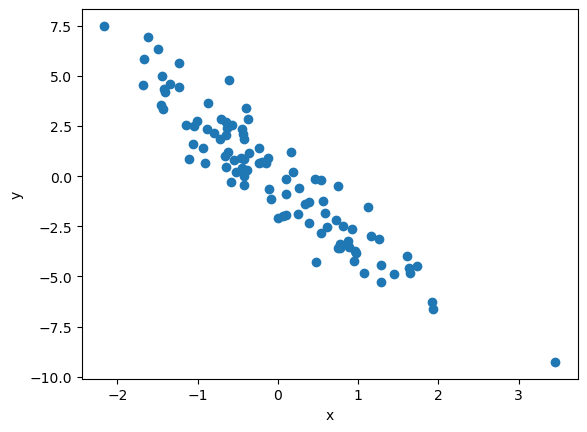

In [10]:
x = torch.empty(100).normal_()
y = -3 * x + torch.empty(100).normal_()
plt.scatter(x, y);
plt.xlabel('x')
plt.ylabel('y')

**Demo**: Plot a colored scatterplot with `plt.scatter(x1, x2, c=y, cmap='viridis')`, showing the relationship between:
  - **`x1`**: 100 normally-distributed random data points
  - **`x2`**: 100 normally-distributed random data points
  - **`y`**: $ -3 x_1 + 2 x_2 + \eta $  
    - (translation: -3 times `x1` plus 2 times `x2`, plus some **noise** (another 100 normally-distributed random data points))



*Tip*: Add `plt.colorbar(label='y')` after the plotting code to show the values of `y`.

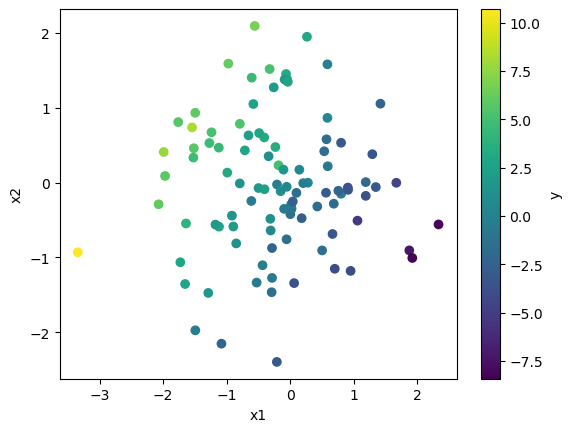

In [11]:
x1 = torch.empty(100).normal_()
x2 = torch.empty(100).normal_()
y = -3 * x1 + 2 * x2 + torch.empty(100).normal_()
plt.scatter(x1, x2, c=y);
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='y');

---

## Section 2: Representing Models and Predictions

In this section, we move from data to models. A model is something that takes inputs and produces predictions. The key thing to remember, especially when working with simulated datasets, is that model predictions are *not* the same as the data; the code is sometimes similar, however, and we have to be careful in how we represent it in our visualizations and algorithms.

We start with simple mathematical functions and visualize them, both in one and two dimensions. The goal is to build intuition for what a model represents and how its structure determines the patterns it can produce.

| Code | Description |
| :-- | :-- |
| `x**2` | `x` to the power of 2 (the square of `x`). |
| `torch.sin(x)` | The sine of the tensor `x`. |

### Exercises

**Example**: Plot the following linear model between the values of -10 and 10: $ y = 3x + 2 $

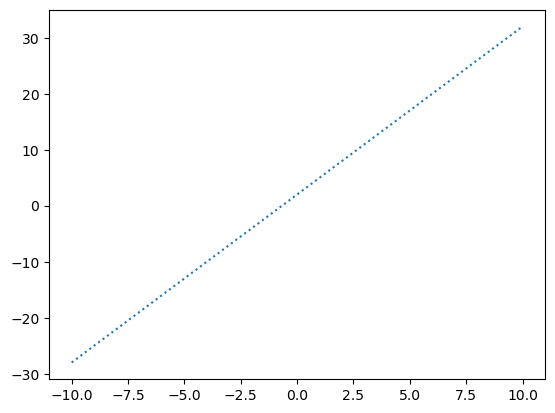

In [12]:
x = torch.linspace(-10, 10, 5)
y = 3 * x + 2
plt.plot(x, y, ':');

**Exercise**: Plot the following non-linear model between the values of -2 and 2: $ y = 0.5 x ^ 2 - 1 $

**Exercise**: Plot the following non-linear model between the values of 0 and 10: $ y = 2 \sin{x} + 5 $

**Example**: Plot the following non-linear model between the values of -2 and 2 for both $x_1$ and $x_2$: $ y = x_1 ^ 2 - 3 x_2 - 1 $  .  

(`plt.contour()`, `plt.contourf()`, and `plt.pcolormesh()` all work here)

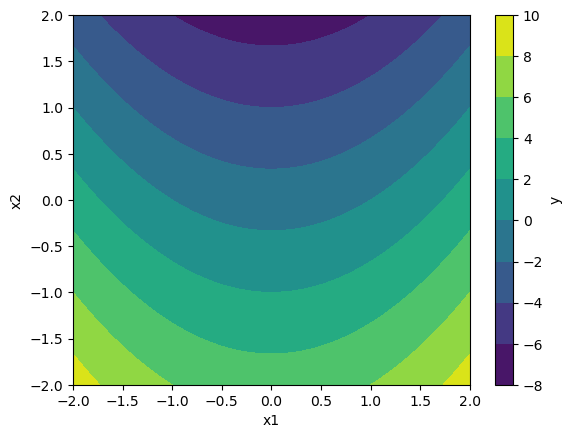

In [15]:
x1 = torch.linspace(-2, 2, 100)
x2 = torch.linspace(-2, 2, 100)
X1, X2 = torch.meshgrid(x1, x2, indexing='xy')
Y =  X1 ** 2 - 3 * X2 - 1

cs = plt.contourf(x1, x2, Y);
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(cs, label='y');


**Exercise**: Plot the following nonlinear model between the values of -2 and 2 for both $x_1$ and $x_2$: $ y = 5 x_1 + 2 x_2 - 10 $  . 

 (`plt.contour()`, `plt.contourf()`, and `plt.pcolormesh()` all work here)

**Exercise**: Generate 50 data points and plot it as a scatter plot, along with the model plotted as a regression line:
  - **Data**: $ y = 3 x + 5 + \eta $
  - **Model**: $ y = 3 x + 5 $

**Exercise**: Generate 50 data points and plot it as a scatter plot, along with the model plotted as a regression line:
  - **Data**: $ y = -x ^ 2 + 5 + \eta $
  - **Model**: $ y = -x ^ 2 + 5 $

---

## Section 3: Fitting Models by Minimizing Loss

Here we introduce the central idea of model fitting: choosing model parameters so that predictions match observed data as closely as possible. 

We measure this mismatch using a **loss function**: a way to measure how well a model’s predictions match the observed data. It takes the predicted values and the true values as input and returns a single number that represents the model’s error. Smaller loss values mean better agreement between the model and the data. During model fitting, the goal is to adjust the model’s parameters to minimize this loss.  We begin with manual trial and error to show how inefficient guessing can be, and then introduce gradient-based optimization as a much more effective approach.



| Loss Function Name | Algorithm | PyTorch Generator |
| :-- | :-- | :-- |
| **Mean Absolute Error** (L1 loss) | (y_pred - y_obs).abs().mean() | `loss_function = nn.L1Loss()` |
| **Mean Squared Error** (L2 loss) | (y_pred - y_obs).square().mean() | `loss_function = nn.MSELoss()` |



### Util Functions

In [19]:
def generate_data():
    """Generates Consistent, Random Data with hidden parameters."""
    
    n_samples = 30
    g = torch.Generator().manual_seed(125)

    # Generate Data Parameters
    weight = torch.empty(1).uniform_(-6, 6, generator=g)
    bias = torch.empty(1).uniform_(-8, 8, generator=g) 

    # Generate Data
    x = torch.empty(n_samples).normal_(generator=g)
    noise = torch.empty(n_samples).normal_(generator=g)
    y = weight * x + bias + noise

    # Return x and y
    return x, y



def linear_model(weight, bias):
    def model(x):
        return weight * x + bias
    return model

### Exercises


Run the cell below to create the variables `y_pred` and `y_obs`, containing *Predicted Data* from a hypothetical model and *Observed Data* from a hypothetical experiment, respectively.

In [20]:
y_obs  = torch.tensor([1., 2., 3., 4., 5.])
y_pred = torch.tensor([1., 3., 5., 3., 1.])

**Example**: Calculate the **Mean Absolute Error** loss, comparing the *Predicted Data* to the *Observed Data*.

In [21]:
loss = torch.mean((y_pred - y_obs).abs() )
loss

tensor(1.6000)

**Exercise**: Calculate the **Mean Squared Error** loss, comparing the *Predicted Data* to the *Observed Data*.

**Example**: Use PyTorch's **Mean Absolute Error** loss function.  Verify that it gets the same result as when you calculated it directly above.

In [23]:
loss_function = nn.L1Loss()  
loss = loss_function(y_pred, y_obs)
loss

tensor(1.6000)

**Exercise**: Use PyTorch's **Mean Squared Error** loss function.  Verify that it gets the same result as when you calculated it directly above.

In [24]:
loss_function = ___  # UPDATE ME!
loss = loss_function(y_pred, y_obs)
loss

TypeError: 'Tensor' object is not callable

**Exercise**: Using trial and error, change the `weight` and `bias` parameters of the model in the code below in order to fit the model by minimizing loss. Run the cell to plot the fitted model together with the data each time you change the `weight` or `bias` parameters.

**Note**: The loss will not go all the way to zero, just try to make it smaller.

Loss: 17.57


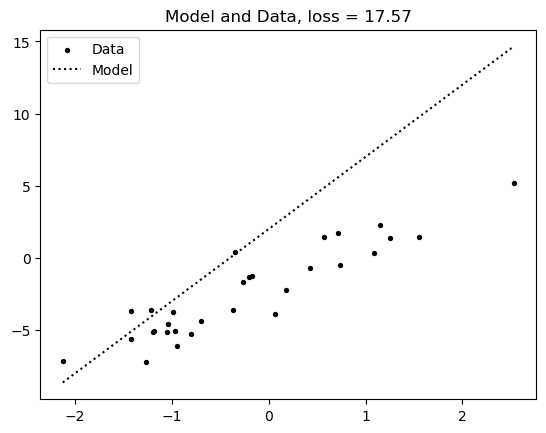

In [ ]:
x, y_obs = generate_data()

# Model the Data
# UPDATE ME: Change the weight and bias parameters to minimize loss to fit the data.
model = linear_model(weight=5, bias=2)  
    
# Check the Model's Predictions Against the Observed Data
y_pred = model(x)
loss_function = nn.MSELoss()
loss = loss_function(y_pred, y_obs)
print(f'Loss: {loss.item():.2f}')

# Plot the Model Against the Data
plt.scatter(x, y_obs, 8, 'k', label = 'Data')
x0 = torch.linspace(x.min(), x.max(), 2);  
plt.plot(x0, model(x0), ':k', label = 'Model')
plt.title(f'Model and Data, loss = {loss.item():.2f}')
plt.legend();


**Exercise**: Machines can do trial and error much faster than us, but even with only two parameters to guess, it still takes many tries for them to randomly hit upon a best fit.  The code below randomly guesses the `weight` and `bias` model parameters `num_iterations` times, and afterwards plots the loss it got for each iteration.  

Just by updating `num_iterations` and running the code below, **approximately** how many guessing iterations are needed before the algorithm randomly gets a loss of **1.7 or lower** ?

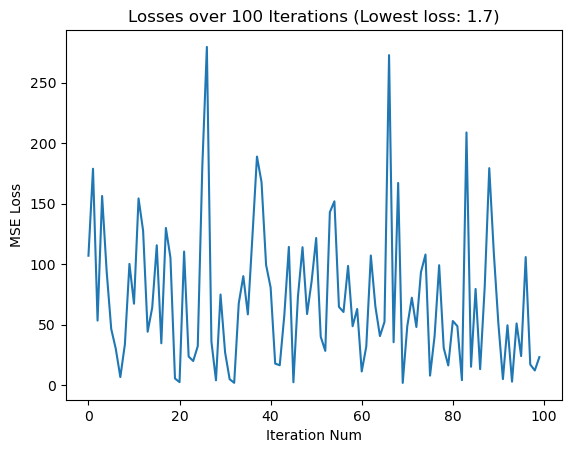

In [ ]:
torch.manual_seed(42)

# Generate Data
x, y_obs = generate_data()

# Update the Model Parameters
num_iterations = 10  # UPDATE ME!

losses = []
for iteration in range(1, num_iterations + 1):

    # Randomly Guess the Model Parameters
    weight = torch.empty(1).uniform_(-10, 10)
    bias = torch.empty(1).uniform_(-10, 10)

    # Check the Model's Predictions Against the Observed Data
    model = linear_model(weight, bias)
    loss_function = nn.MSELoss()
    y_pred = model(x)
    loss = loss_function(y_pred, y_obs)
    losses.append(loss)


# Plot the Loss for each Iteration
plt.plot(losses)
plt.title(f'Losses over {iteration} Iterations (Lowest loss: {min(losses):.2})')
plt.xlabel('Iteration Num')
plt.ylabel('MSE Loss');



**Exercise**: Machine Learning algorithms tend to need to find a more-optimized method for guessing parameters. Below, the **"Standard Gradient Descent"** algorithm is illustrated.  

Just by updating `num_iterations` and running the code below, how many iterations are needed before the algorithm reaches a loss of **1.7 or lower** ?  Looking at the plot, what do you notice about the change in loss from iteration to iteration with this method?  How does this pattern and overall efficiency compare to random guessing?

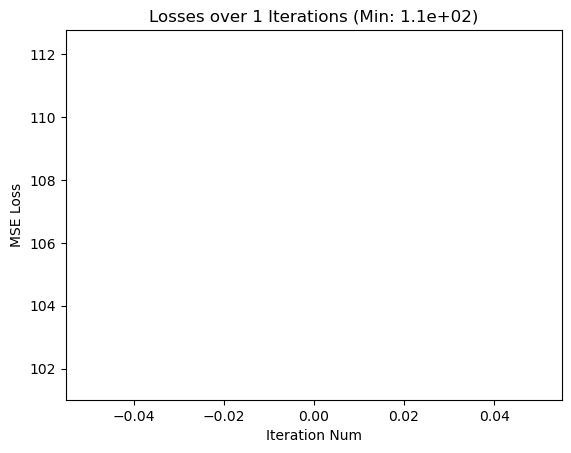

In [ ]:
torch.manual_seed(42)

# Generate Data
x, y_obs = generate_data()

# Randomly Guess the Model Parameters
num_iterations = 1  # UPDATE ME!

weight = torch.empty(1).uniform_(-10, 10).requires_grad_()
bias = torch.empty(1).uniform_(-10, 10).requires_grad_()

losses = []
for iteration in range(1, num_iterations + 1):

    # Forward Pass: Check the Model's Predictions
    if weight.grad is not None:
        weight.grad.zero_()
    if bias.grad is not None:
        bias.grad.zero_()

    model = linear_model(weight, bias)
    y_pred = model(x)
    loss = loss_function(y_pred, y_obs)
    losses.append(loss)

    # Backward Pass: Improve the Model based on the Loss Gradient
    loss.backward()  
    with torch.no_grad():
        weight -= weight.grad * .1
        bias -= bias.grad * .1


# Plot the Loss for each Iteration
plt.plot(torch.tensor(losses))
plt.title(f'Losses over {iteration} Iterations (Min: {min(losses):.2})')
plt.xlabel('Iteration Num')
plt.ylabel('MSE Loss');



---

## Section 4: Automatic Differentiation (Autograd)

Computing derivatives is a fundamental part of so-called gradient descent - the optimization algorithm that what makes machine learning so powerful. PyTorch can automatically compute gradients for you, so you don't have to do it manually.

For further reference to these features, the tutorial in the PyTorch is very helpful: https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



```python
x = torch.tensor([2.], requires_grad=True)
y = x ** 2
y.backward()
x.grad  # tensor([4.])
```

| Code | Description |
| :-- | :-- |
| `x = torch.tensor([content_of_tensor], requires_grad=True)` | Create tensor and specify that gradients should be tracked. |
| `x.requires_grad` | Check if gradient tracking is on. |
| `y.backward()` | Do backpropagation on `y`. This calculates the gradients. |
| `x.detach()` | Stop gradient tracking by detaching the tensor from the graph. |
| `with torch.no_grad():` | Pause gradient tracking temporarily|
| `x.grad.zero_()` | Reset the gradient. |

**Example**: Create a tensor `f` that contains a scalar ``3.0`` and specify that gradients should be tracked

In [ ]:
f = torch.tensor([3.0], requires_grad=True)
f

tensor([3.], requires_grad=True)

**Exercise**: Create a tensor `g` that contains a scalar ``5.0`` and specify that gradients should be tracked.

**Exercise**: Check that gradient gradient tracking is on for `g`.

**Exercise**: Check what `g`'s gradient is.

**Note**: Since we haven't carried out any operations on `g` yet, it should be empty and nothing will be displayed when you print it.

**Exercise**: Run the cell below where `h` is set to `7` times the tensor `g`. No need to change the code.

In [ ]:
h = 7 * g
g

tensor([5.], requires_grad=True)

**Exercise**: Do backpropagation on `h`. This calculates the gradient of `g`.

**Exercise**: Check the gradient of `g` again. This time, it should not be empty. Can you guess why it has this particular value?

**Hint**: Compare the value of `g`'s gradient to the equation where `h` is calculated above.

**Exercise**: Check the gradient function of `h`.
If you display it, it should start with `<MulBackward0`. Why does it say "Mul" in the beginning, do you think?

**Exercise**: Run the cell below to create the tensor `c` which contains the scalar `6.0` and sets `d = c + 3`. You don't have to change anything in the code.

In [ ]:
c = torch.tensor([6.0], requires_grad=True)
d = c + 3
d

tensor([9.], grad_fn=<AddBackward0>)

**Exercise**: Do backpropagation on `d`.

**Exercise**: Check the gradient of `c`.

**Exercise**: Check the gradient function of `d`. The output should start with `<AddBackward0`. Why does it start with "Add", do you think?

**Exercise**: Reset ("zero out") `c`'s gradient.